In [1]:
#import all your packages
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import numba
import os
import warnings
warnings.filterwarnings('ignore')
import umap
reducer = umap.UMAP()

In [2]:
#set the style and size of figures produced
sns.set(style='white', context='notebook', rc={'figure.figsize':(5,5)})

In [3]:
#set the path where your files are
path = "/Users/Caroline/Desktop/BMIF6310 project"
os.chdir(path)

In [4]:
#indicate which CSV file contains your panel and parameters for UMAP and clustering
csv_file_surface = "panel.csv"
panel = pd.read_csv(csv_file_surface)
panel = panel.drop(panel.columns[1], axis=1,)
print(panel)

            Surface
0          89Y_CD45
1        142Ce_CD19
2     145Nd_CD4 (v)
3    146Nd_CD8a (v)
4        148Sm_CD14
5         170Yb_CD3
6  174Yb_HLA-DR (v)
7    209Bi_CD16 (v)


In [5]:
#Read in your experimental CSV file
csv_file = "data file.csv"
dat_full = pd.read_csv(csv_file, header = 1, index_col = 0)
dat_full.head()

,Time,Event_length,75As,89Y_CD45,103Rh_Rh,138Ba_barium,139La,140Ce,141Pr,142Ce_CD19,...,209Bi_CD16 (v),Center,Offset,Width,Residual,tSNE1,tSNE2,UMAP1,UMAP2,cluster
Event #,,,,,,,,,,,,,,,,,,,,,
1,100038.4531,25,0.0,575.513062,1.260524,58.273037,0.000000,0.000000,0.134559,181.093765,...,0.000000,889.348999,95.940002,71.580002,113.392998,-92.772690,59.686779,9.929104,10.267679,1
2,100046.3438,17,0.0,106.572922,3.601627,60.473598,2.311358,0.000000,0.000000,0.000000,...,132.189987,645.778015,90.635002,45.831001,82.169998,4.894042,104.412270,6.351114,-7.294892,4
3,100065.6875,18,0.0,330.481781,0.000000,70.945312,3.729413,0.000000,0.000000,0.000000,...,51.104691,683.374023,95.511002,50.980999,76.592003,53.835186,82.105911,7.446544,-4.803083,4
4,100071.6797,21,0.0,401.245361,0.000000,55.678341,0.000000,0.016739,0.000000,0.234581,...,0.423719,718.971985,98.165001,60.991001,69.485001,-53.369854,-42.082760,-0.489216,-11.392115,9
5,100174.7266,20,0.0,539.095093,0.552271,53.094040,0.000000,0.000000,0.000000,0.000000,...,0.000000,674.202026,89.085999,52.969002,92.703003,-73.922104,-89.805672,-0.972254,-13.189031,9


In [6]:
#Transform you data. For mass cytometry, this is an arcsinh transformation, cofactor of 5
from sklearn import preprocessing
df=np.arcsinh(dat_full/5)

#names=df.columns
#scaler = preprocessing.StandardScaler()
#scaled_df = scaler.fit_transform(df)
#scaled_df = pd.DataFrame(scaled_df, columns=names)

In [7]:
#Select a subset of data for clustering, and save this as a CSV
dat_subset = df.iloc[0:8000]
dat_subset.index.name='index'
dat_subset.to_csv("sample file.csv")

In [8]:
#Create a data object that is your subset, vs. the parameters you will be running UMAP on
dat = dat_subset[panel['Surface']]
dat.head()

,89Y_CD45,142Ce_CD19,145Nd_CD4 (v),146Nd_CD8a (v),148Sm_CD14,170Yb_CD3,174Yb_HLA-DR (v),209Bi_CD16 (v)
index,,,,,,,,
1,7.048410,5.892170,0.485085,0.000000,0.000000,0.000000,7.111999,0.000000
2,5.361999,0.000000,0.000000,3.753984,0.000000,0.000000,0.000000,5.577402
3,6.493701,0.000000,0.000000,1.492518,0.000000,2.673159,0.000000,4.627119
4,6.687722,0.232481,2.205979,6.447762,0.179422,4.660582,1.483036,0.411967
5,6.983040,0.000000,0.000000,6.622299,0.000000,5.356152,0.000000,0.000000


In [9]:
#run UMAP 
run_umap = umap.UMAP(n_neighbors=30,min_dist=0.1, n_components=2, metric='euclidean').fit_transform(dat)
run_umap

array([[ 11.213107 ,  13.8035345],
       [  7.7932243,  -7.897661 ],
       [  8.87931  ,  -7.5367813],
       ...,
       [ -5.1013904, -11.962317 ],
       [ -6.887137 ,   2.9181068],
       [ 10.175254 ,  -4.601942 ]], dtype=float32)

In [10]:
#generate array of your UMAP values
dat_umap = pd.DataFrame(run_umap)
#dat_umap.index=dat_umap+1
dat_umap.index+=1;dat_umap.index.name='index'
dat_umap.to_csv("umap axes.csv")
dat_umap = pd.read_csv("umap axes.csv", header = 0, index_col = 0)
dat_umap.head()

,0,1
index,,
1,11.213107,13.803534
2,7.793224,-7.897661
3,8.879310,-7.536781
4,-4.454239,-12.202549
5,-3.665200,-13.569514


In [11]:
dat_umap.columns = ["umap1", "umap2"]
dat_umap.head()

,umap1,umap2
index,,
1,11.213107,13.803534
2,7.793224,-7.897661
3,8.879310,-7.536781
4,-4.454239,-12.202549
5,-3.665200,-13.569514


In [12]:
#add UMAP values to CSV file UMAP was run on
final = pd.concat([dat, dat_umap], axis=1)
final.head()

,89Y_CD45,142Ce_CD19,145Nd_CD4 (v),146Nd_CD8a (v),148Sm_CD14,170Yb_CD3,174Yb_HLA-DR (v),209Bi_CD16 (v),umap1,umap2
index,,,,,,,,,,
1,7.048410,5.892170,0.485085,0.000000,0.000000,0.000000,7.111999,0.000000,11.213107,13.803534
2,5.361999,0.000000,0.000000,3.753984,0.000000,0.000000,0.000000,5.577402,7.793224,-7.897661
3,6.493701,0.000000,0.000000,1.492518,0.000000,2.673159,0.000000,4.627119,8.879310,-7.536781
4,6.687722,0.232481,2.205979,6.447762,0.179422,4.660582,1.483036,0.411967,-4.454239,-12.202549
5,6.983040,0.000000,0.000000,6.622299,0.000000,5.356152,0.000000,0.000000,-3.665200,-13.569514


In [13]:
#Drop any NaN values from the file. This should NOT be necessary if your indeces were lined up correctly. 
final_clean=pd.DataFrame(final.dropna(axis='rows'))
final_clean.head()

,89Y_CD45,142Ce_CD19,145Nd_CD4 (v),146Nd_CD8a (v),148Sm_CD14,170Yb_CD3,174Yb_HLA-DR (v),209Bi_CD16 (v),umap1,umap2
index,,,,,,,,,,
1,7.048410,5.892170,0.485085,0.000000,0.000000,0.000000,7.111999,0.000000,11.213107,13.803534
2,5.361999,0.000000,0.000000,3.753984,0.000000,0.000000,0.000000,5.577402,7.793224,-7.897661
3,6.493701,0.000000,0.000000,1.492518,0.000000,2.673159,0.000000,4.627119,8.879310,-7.536781
4,6.687722,0.232481,2.205979,6.447762,0.179422,4.660582,1.483036,0.411967,-4.454239,-12.202549
5,6.983040,0.000000,0.000000,6.622299,0.000000,5.356152,0.000000,0.000000,-3.665200,-13.569514


In [14]:
#write this file to CSV
pd.DataFrame.to_csv(final_clean, "cells_umap.csv")

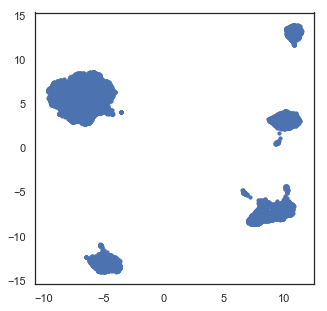

In [15]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], s=10)

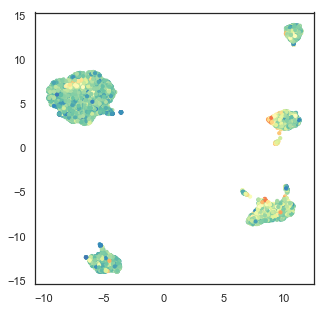

In [16]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['89Y_CD45'], s=10, cmap='Spectral')

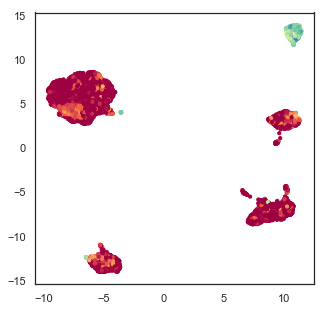

In [17]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['142Ce_CD19'], s=10, cmap='Spectral')

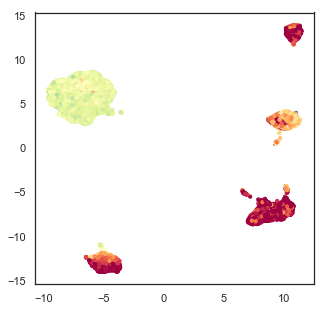

In [18]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['145Nd_CD4 (v)'], s=10, cmap='Spectral')

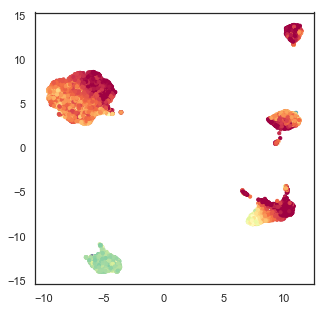

In [19]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['146Nd_CD8a (v)'], s=10, cmap='Spectral')

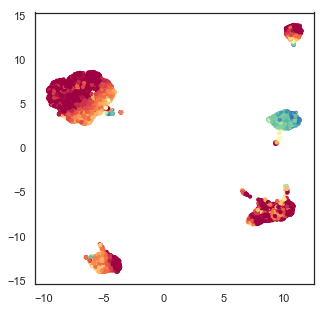

In [20]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['148Sm_CD14'], s=10, cmap='Spectral')

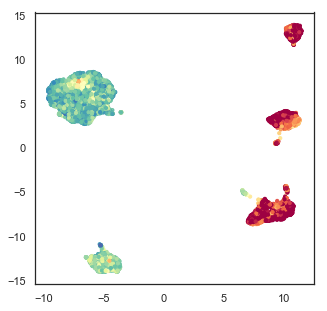

In [21]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['170Yb_CD3'], s=10, cmap='Spectral')

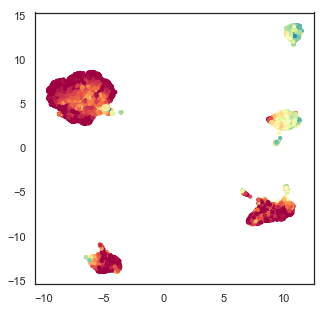

In [22]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['174Yb_HLA-DR (v)'], s=10, cmap='Spectral')

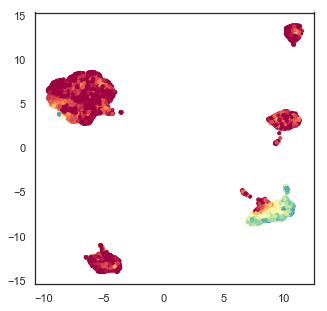

In [23]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=final_clean['209Bi_CD16 (v)'], s=10, cmap='Spectral')

In [24]:
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [33]:
kmeans_labels = cluster.KMeans(n_clusters=5).fit_predict(final_clean)

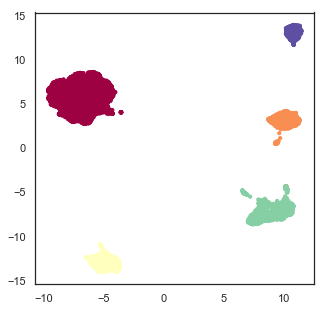

In [34]:
plt.scatter(final_clean['umap1'], final_clean['umap2'], c=kmeans_labels, s=10, cmap='Spectral')

In [35]:
dat_cluster = pd.DataFrame(kmeans_labels)

In [36]:
dat_cluster.index+=1;dat_cluster.index.name='index'
dat_cluster.to_csv("cluster.csv")
dat_cluster = pd.read_csv("cluster.csv", header = 0, index_col = 0)
dat_cluster.columns = ["cluster"]
dat_cluster.head()

,cluster
index,
1,4
2,3
3,3
4,2
5,2


In [37]:
cluster_final = pd.concat([dat_cluster, final_clean], axis=1)
cluster_final.head()

,cluster,89Y_CD45,142Ce_CD19,145Nd_CD4 (v),146Nd_CD8a (v),148Sm_CD14,170Yb_CD3,174Yb_HLA-DR (v),209Bi_CD16 (v),umap1,umap2
index,,,,,,,,,,,
1,4,7.048410,5.892170,0.485085,0.000000,0.000000,0.000000,7.111999,0.000000,11.213107,13.803534
2,3,5.361999,0.000000,0.000000,3.753984,0.000000,0.000000,0.000000,5.577402,7.793224,-7.897661
3,3,6.493701,0.000000,0.000000,1.492518,0.000000,2.673159,0.000000,4.627119,8.879310,-7.536781
4,2,6.687722,0.232481,2.205979,6.447762,0.179422,4.660582,1.483036,0.411967,-4.454239,-12.202549
5,2,6.983040,0.000000,0.000000,6.622299,0.000000,5.356152,0.000000,0.000000,-3.665200,-13.569514


In [38]:
pd.DataFrame.to_csv(cluster_final, "cells_umap_clustered.csv")